In [1]:
import pandas as pd
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_140224\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
target_data_first = pd.read_csv("soundData/4차년도.csv", encoding="cp949")
target_data_second = pd.read_csv("soundData/5차년도.csv", encoding="cp949")
target_data_third = pd.read_csv("soundData/5차년도_2차.csv", encoding="cp949")

In [3]:
target_data_first

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,5e53d6067bef803b4851dfc6,"아, 요즘 룸메랑 너무 자주 싸우게 돼.",anger,Disgust,1,Angry,2,Angry,1,Disgust,1,Angry,1,35,male
14602,5e53d61cc38c123b9ec6dde6,"아, 룸메가 방을 너무 지저분하게 써. 음식물도 막 버리고.",anger,Disgust,1,Angry,2,Angry,1,Disgust,1,Angry,1,35,male
14603,5e53d6332a2d173b73a03210,"뭐 화를 낸 것까진 아니지만, 한 달 전 쯤에 좀 확실하게 얘기를 해뒀거든. 근데 ...",anger,Disgust,1,Angry,2,Sadness,1,Disgust,1,Angry,2,35,male
14604,5e53d659963e443aee02b7d0,"어. 고등학교 동창인데, 같은 동네 오게 돼서 같이 룸메로 살게 됐지.",anger,Neutral,0,Angry,1,Sadness,1,Neutral,0,Neutral,0,35,male


In [4]:
target_data_first['wav_id'] = 'soundData/four/'+target_data_first['wav_id']+'.wav'
target_data_second['wav_id'] = 'soundData/five/'+target_data_second['wav_id']+'.wav'
target_data_third['wav_id'] = 'soundData/five_sub/'+target_data_third['wav_id']+'.wav'

In [5]:
target_data = pd.concat([target_data_first, target_data_second,target_data_third], axis=0)

In [6]:
target_data_reset = target_data.reset_index(drop=True)

In [7]:
target_data_reset

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,soundData/four/5e258fd1305bcf3ad153a6a4.wav,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,soundData/four/5e258fe2305bcf3ad153a6a5.wav,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,soundData/four/5e258ff5305bcf3ad153a6a6.wav,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
3,soundData/four/5e25902f305bcf3ad153a6a9.wav,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
4,soundData/four/5e27f90b5807b852d9e0157b.wav,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43986,soundData/five_sub/5fbe313c44697678c497c05a.wav,나 엘리베이터에 갇혔어.,fear,happiness,1,sadness,1,sadness,2,sadness,1,sadness,1,23,female
43987,soundData/five_sub/5fbe251044697678c497bfb8.wav,하지만 기분이 나쁜 걸 어떡해?,angry,sadness,1,fear,1,sadness,2,sadness,1,neutral,0,23,female
43988,soundData/five_sub/5fbe31584c55eb78bd7cee7f.wav,자취방 엘리베이턴데 정전인가봐.,fear,sadness,1,neutral,0,sadness,2,fear,1,sadness,1,23,female
43989,soundData/five_sub/5fbe2f8544697678c497c047.wav,나 드디어 프로젝트 끝났어!,happiness,disgust,1,sadness,1,neutral,0,happiness,1,sadness,1,23,female


In [8]:
target_data_reset.columns

Index(['wav_id', '발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정',
       '3번 감정세기', '4번 감정', '4번감정세기', '5번 감정', '5번 감정세기', '나이', '성별'],
      dtype='object')

In [9]:
target_data_emotion = target_data_reset.drop(['발화문', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정','3번 감정세기', '4번 감정', '4번감정세기', '5번 감정', '5번 감정세기', '나이', '성별'], axis=1)

In [10]:
target_data_emotion

,wav_id,상황
0,soundData/four/5e258fd1305bcf3ad153a6a4.wav,anger
1,soundData/four/5e258fe2305bcf3ad153a6a5.wav,anger
2,soundData/four/5e258ff5305bcf3ad153a6a6.wav,anger
3,soundData/four/5e25902f305bcf3ad153a6a9.wav,anger
4,soundData/four/5e27f90b5807b852d9e0157b.wav,sad
...,...,...
43986,soundData/five_sub/5fbe313c44697678c497c05a.wav,fear
43987,soundData/five_sub/5fbe251044697678c497bfb8.wav,angry
43988,soundData/five_sub/5fbe31584c55eb78bd7cee7f.wav,fear
43989,soundData/five_sub/5fbe2f8544697678c497c047.wav,happiness


In [11]:
np.unique(target_data_emotion.상황)

array(['anger', 'angry', 'disgust', 'fear', 'happiness', 'neutral', 'sad',
       'sadness', 'surprise'], dtype=object)

In [12]:
target_data_emotion.loc[target_data_emotion["상황"] == 'angry', "상황"] = "anger"
# target_data_emotion.loc[target_data_emotion['상황'] == "surprise", "상황"] = "neutral"
target_data_emotion.loc[target_data_emotion["상황"] == 'sad', "상황"] = 'sadness'

In [13]:
target_data_emotion = target_data_emotion.loc[target_data_emotion['상황'] != "surprise"]

In [14]:
target_data_emotion = target_data_emotion.reset_index(drop=True)

In [15]:
target_data_emotion.rename(columns = {'상황' : 'Emotions', "wav_id" : "Path"}, inplace = True)

In [16]:
target_data_emotion

,Path,Emotions
0,soundData/four/5e258fd1305bcf3ad153a6a4.wav,anger
1,soundData/four/5e258fe2305bcf3ad153a6a5.wav,anger
2,soundData/four/5e258ff5305bcf3ad153a6a6.wav,anger
3,soundData/four/5e25902f305bcf3ad153a6a9.wav,anger
4,soundData/four/5e27f90b5807b852d9e0157b.wav,sadness
...,...,...
42231,soundData/five_sub/5fbe313c44697678c497c05a.wav,fear
42232,soundData/five_sub/5fbe251044697678c497bfb8.wav,anger
42233,soundData/five_sub/5fbe31584c55eb78bd7cee7f.wav,fear
42234,soundData/five_sub/5fbe2f8544697678c497c047.wav,happiness


In [17]:
np.unique(target_data_emotion["Emotions"])

array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
target_data_emotion.Emotions

0            anger
1            anger
2            anger
3            anger
4          sadness
           ...    
42231         fear
42232        anger
42233         fear
42234    happiness
42235      disgust
Name: Emotions, Length: 42236, dtype: object

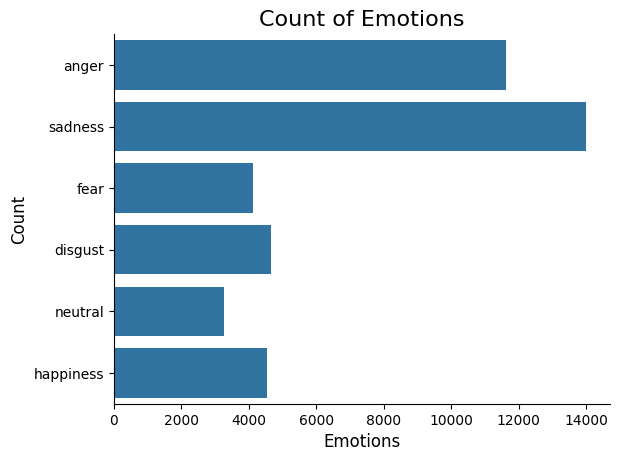

In [20]:
# 감정의 전체적인 분포 확인하기
plt.title('Count of Emotions', size=16)
sns.countplot(target_data_emotion.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [21]:
# 음성데이터를 waveplot, spectrogram 이미지로 표현

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, color='blue')
    plt.show()

def create_spectrogram(data, sr, e):
    # stft 함수는 음성을 시간기반에서 주파수기반으로 변환함
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [22]:
import librosa
from IPython.display import Audio

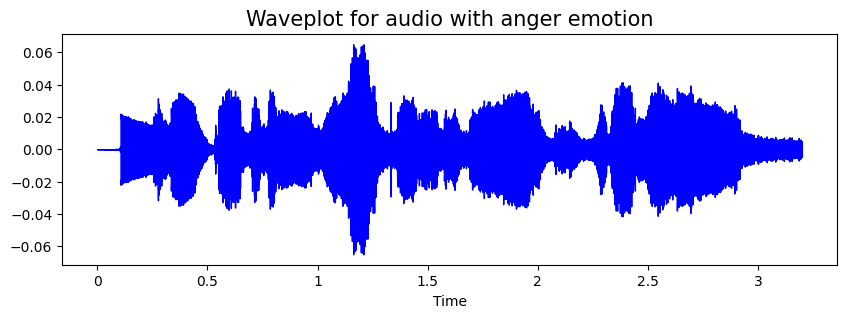

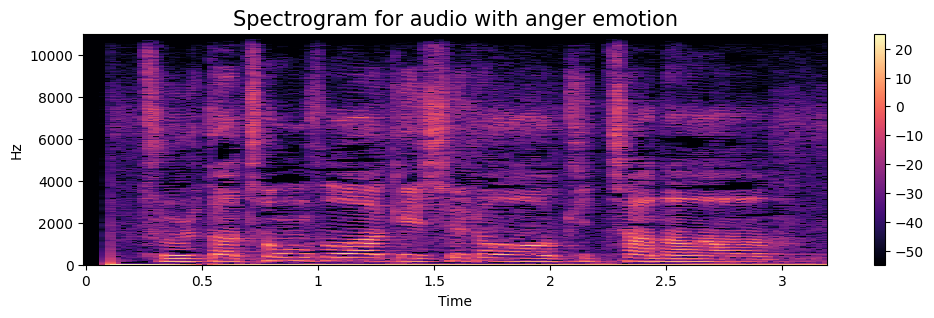

In [24]:
#화남 음성데이터 예시로 보기
emotion='anger'
path = np.array(target_data_emotion.Path[target_data_emotion.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

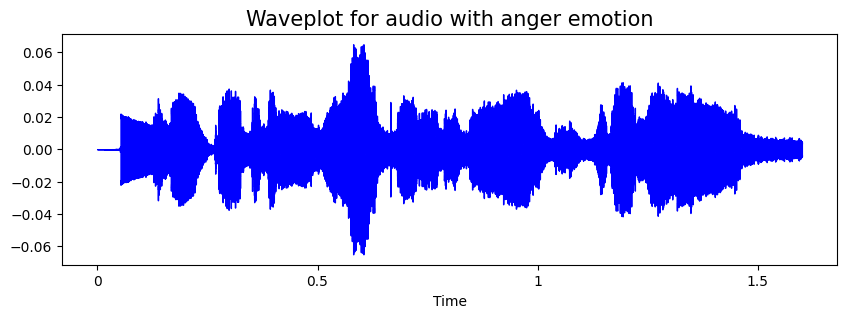

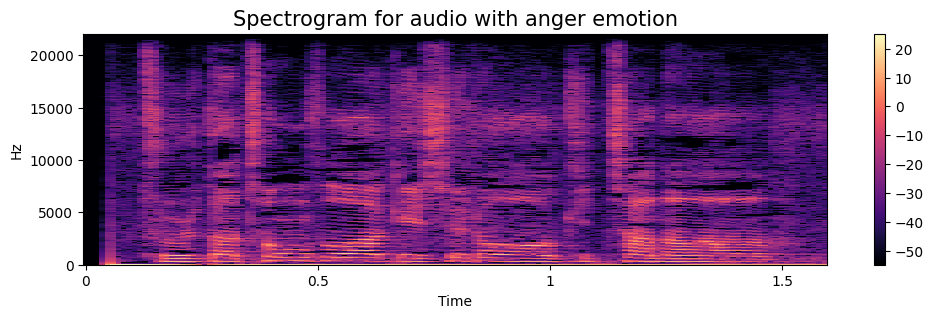

In [28]:
#화남 음성데이터 예시로 보기
emotion='anger'
path = np.array(target_data_emotion.Path[target_data_emotion.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
sampling_rate = 44100
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [29]:
# 음성데이터 argumentation을 통해서 데이터 수 늘리기 및 오버피팅 방지
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitchs(data, sampling_rate, n_steps):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=n_steps)


In [44]:
def extract_features(data, sampling_rate):

    result = np.array([])

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally
    
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally
    
    # # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [45]:
# 음성의 특성을 추출한 데이터를 축적하는 함수 (Argumentation된 데이터도 같이)
def get_features(path):
    # duration과 offset은 각 오디오 파일의 시작과 끝에서 오디오가 없는 것을 처리
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # 원래데이터
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
#     # 노이즈가 추가된 데이터
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # 병렬적으로 추가

#     # 피칭및 스트레칭된 데이터
    new_data = stretch(data)
    data_stretch_pitch = pitchs(new_data, sample_rate, 0.7)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # 병렬적으로 추가

    return result

In [30]:
def extract_features1(data, sampling_rate):

    result = np.array([])

    # ZCR
#     zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
#     result=np.hstack((result, zcr)) # stacking horizontally
    
#     # Chroma_stft
#     stft = np.abs(librosa.stft(data))
#     chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
#     result = np.hstack((result, chroma_stft)) # stacking horizontally
    
    # # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [31]:
# 음성의 특성을 추출한 데이터를 축적하는 함수 (Argumentation된 데이터도 같이)
def get_features1(path):
    # duration과 offset은 각 오디오 파일의 시작과 끝에서 오디오가 없는 것을 처리
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    sample_rate = 44100
    # 원래데이터
    res1 = extract_features1(data, sample_rate)
    result = np.array(res1)
#     # 노이즈가 추가된 데이터
    noise_data = noise(data)
    res2 = extract_features1(noise_data, sample_rate)
    result = np.vstack((result, res2)) # 병렬적으로 추가

#     # 피칭및 스트레칭된 데이터
    new_data = stretch(data)
    data_stretch_pitch = pitchs(new_data, sample_rate, 0.7)
    res3 = extract_features1(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # 병렬적으로 추가

    return result

In [48]:
def extract_features2(data, sampling_rate):

    result = np.array([])

    # ZCR
#     zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
#     result=np.hstack((result, zcr)) # stacking horizontally
    
#     # Chroma_stft
#     stft = np.abs(librosa.stft(data))
#     chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
#     result = np.hstack((result, chroma_stft)) # stacking horizontally
    
    # # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    # result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [49]:
# 음성의 특성을 추출한 데이터를 축적하는 함수 (Argumentation된 데이터도 같이)
def get_features2(path):
    # duration과 offset은 각 오디오 파일의 시작과 끝에서 오디오가 없는 것을 처리
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # 원래데이터
    res1 = extract_features2(data, sample_rate)
    result = np.array(res1)
#     # 노이즈가 추가된 데이터
    noise_data = noise(data)
    res2 = extract_features2(noise_data, sample_rate)
    result = np.vstack((result, res2)) # 병렬적으로 추가

#     # 피칭및 스트레칭된 데이터
    new_data = stretch(data)
    data_stretch_pitch = pitchs(new_data, sample_rate, 0.7)
    res3 = extract_features2(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # 병렬적으로 추가

    return result

In [50]:
def extract_features3(data, sampling_rate):

    result = np.array([])

    # ZCR
#     zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
#     result=np.hstack((result, zcr)) # stacking horizontally
    
#     # Chroma_stft
#     stft = np.abs(librosa.stft(data))
#     chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
#     result = np.hstack((result, chroma_stft)) # stacking horizontally
    
    # # MFCC
    # mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    # result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [51]:
# 음성의 특성을 추출한 데이터를 축적하는 함수 (Argumentation된 데이터도 같이)
def get_features3(path):
    # duration과 offset은 각 오디오 파일의 시작과 끝에서 오디오가 없는 것을 처리
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # 원래데이터
    res1 = extract_features3(data, sample_rate)
    result = np.array(res1)
#     # 노이즈가 추가된 데이터
    noise_data = noise(data)
    res2 = extract_features3(noise_data, sample_rate)
    result = np.vstack((result, res2)) # 병렬적으로 추가

#     # 피칭및 스트레칭된 데이터
    new_data = stretch(data)
    data_stretch_pitch = pitchs(new_data, sample_rate, 0.7)
    res3 = extract_features3(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # 병렬적으로 추가

    return result

In [34]:
import os
for index, row in target_data_emotion.iterrows():
    file_path = row['Path']
    if not os.path.exists(file_path):
        target_data_emotion.drop(index, inplace=True)

In [53]:
X, Y = [], []
for path, emotion in zip(target_data_emotion.Path, target_data_emotion.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

C:\Users\user\anaconda3\envs\py310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [54]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_ZCR_SCFT_MFCC_RMS_MEL.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.068721,0.574300,0.500504,0.399080,0.396034,0.433759,0.573091,0.661434,0.679269,0.636416,...,0.000212,0.000123,0.000132,0.000080,0.000051,0.000045,0.000029,0.000013,9.703022e-07,anger
1,0.079463,0.602793,0.543666,0.466542,0.482463,0.530298,0.625475,0.677002,0.682174,0.653053,...,0.000297,0.000203,0.000211,0.000162,0.000128,0.000129,0.000105,0.000089,8.027871e-05,anger
2,0.050221,0.523847,0.500847,0.392212,0.360460,0.375405,0.504429,0.670689,0.652271,0.633504,...,0.000133,0.000096,0.000027,0.000026,0.000022,0.000012,0.000011,0.000005,3.741708e-07,anger
3,0.079332,0.661401,0.551384,0.529904,0.536144,0.496949,0.531961,0.548046,0.607730,0.584090,...,0.000189,0.000110,0.000112,0.000066,0.000065,0.000056,0.000040,0.000020,1.373281e-06,anger
4,0.114176,0.697515,0.680009,0.603691,0.636145,0.622124,0.599235,0.575058,0.584113,0.598233,...,0.000457,0.000387,0.000380,0.000342,0.000356,0.000322,0.000309,0.000301,2.808062e-04,anger


In [35]:
X, Y = [], []
for path, emotion in zip(target_data_emotion.Path, target_data_emotion.Emotions):
    feature = get_features1(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [36]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_MFCC_MEL_44100.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,-434.397797,70.921379,-5.893759,8.323498,-14.905013,3.286163,-13.344301,-0.597952,-13.473495,17.434187,...,0.000332,0.000184,0.000072,0.000066,0.000040,0.000025,0.000020,0.000009,1.422329e-06,anger
1,-433.233405,69.484132,-4.723213,7.360671,-14.052460,2.389644,-12.401154,-1.523313,-12.531225,16.498179,...,0.000332,0.000184,0.000072,0.000066,0.000041,0.000025,0.000020,0.000010,1.586880e-06,anger
2,-504.409149,64.032059,-6.671339,1.925960,-15.027856,-0.607418,-11.239526,-1.876202,-7.441399,18.428106,...,0.000061,0.000062,0.000060,0.000019,0.000013,0.000010,0.000006,0.000004,4.717677e-07,anger
3,-414.248047,71.440384,-12.586851,2.778891,-15.150665,9.575104,-14.859186,-9.263065,-13.070717,23.413485,...,0.000260,0.000143,0.000062,0.000058,0.000034,0.000033,0.000024,0.000015,2.106240e-06,anger
4,-372.073164,43.540396,0.830944,-4.966355,-6.584886,2.662977,-5.120013,-11.467734,-3.761223,12.547589,...,0.000348,0.000236,0.000155,0.000152,0.000123,0.000121,0.000114,0.000106,9.371953e-05,anger


In [57]:
X, Y = [], []
for path, emotion in zip(target_data_emotion.Path, target_data_emotion.Emotions):
    feature = get_features2(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [58]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_MFCC.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-415.361755,72.224693,4.757228,22.024660,-7.468746,9.577067,-8.639965,15.034519,-23.448441,16.948463,...,-3.931750,-3.281601,-1.899613,2.359723,6.410924,4.475190,-4.098377,-1.267751,10.269837,anger
1,-397.943008,56.707922,12.668263,15.861688,-1.460216,2.442069,-1.423752,8.054613,-15.955816,10.180028,...,-7.190061,-0.293290,-4.104114,4.345541,4.430217,5.423108,-5.226371,1.238049,6.735763,anger
2,-484.022614,66.650978,6.307154,16.172136,-6.870571,5.009261,-7.100348,10.470600,-22.409895,15.637044,...,0.951344,-4.016384,3.554343,4.922379,7.777921,3.526608,-3.229036,6.234205,7.711937,anger
3,-394.473877,76.370163,2.615793,16.192711,-16.572311,9.222215,-0.099308,18.952885,-27.506077,9.522485,...,-4.123139,-2.376334,3.677343,-0.432691,4.290534,7.868842,-6.732822,-4.141521,10.976520,anger
4,-340.119416,42.994443,13.547365,5.624892,-5.442980,0.130013,6.555159,6.332881,-11.802520,-0.640017,...,-5.144852,2.253876,1.957482,2.292511,2.347049,4.673205,-4.814169,-0.738692,3.942068,anger


In [59]:
X, Y = [], []
for path, emotion in zip(target_data_emotion.Path, target_data_emotion.Emotions):
    feature = get_features3(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [60]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_MEL.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,labels
0,0.141225,0.001754,0.000612,0.001194,0.077771,0.122002,0.240680,0.078757,0.005447,0.006286,...,0.000212,0.000123,0.000132,0.000080,0.000051,0.000045,0.000029,0.000013,9.703022e-07,anger
1,0.141138,0.001762,0.000682,0.001279,0.077634,0.121635,0.240779,0.079106,0.005559,0.006286,...,0.000258,0.000169,0.000174,0.000124,0.000094,0.000093,0.000076,0.000059,4.703094e-05,anger
2,0.100428,0.000723,0.000271,0.000151,0.002311,0.011303,0.021725,0.022207,0.006190,0.001034,...,0.000133,0.000096,0.000027,0.000026,0.000022,0.000012,0.000011,0.000005,3.741708e-07,anger
3,0.138351,0.000736,0.000377,0.001839,0.126227,0.186621,0.091826,0.009720,0.001518,0.008634,...,0.000189,0.000110,0.000112,0.000066,0.000065,0.000056,0.000040,0.000020,1.373281e-06,anger
4,0.138593,0.000785,0.000480,0.001941,0.125726,0.186192,0.091892,0.009859,0.001589,0.008628,...,0.000281,0.000204,0.000213,0.000158,0.000150,0.000140,0.000123,0.000104,9.250237e-05,anger
